In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nemak_raw = pd.read_excel('NEMAK_wybrane.xlsx')

In [3]:
clean_nemak_raw = nemak_raw.dropna(how='any')

In [4]:
clean_nemak_raw['status_value'] = clean_nemak_raw['Leakage_High'].apply(lambda x: 1 if x <=0.125 else 0)

C:\Users\patry\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
import random

class Status:
    GOOD = "GOOD"
    NO_GOOD = "NO GOOD"
    
    
class Leakage:
    def __init__(self,value ):
        self.value = value
        self.leakage_status = self.get_leakage_status()
        
    def get_leakage_status(self):
        if self.value<=0.125:
            return Status.GOOD
        else:
            return Status.NO_GOOD


class LeakageContainer:
    def __init__(self,inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        self.conected = self.connect()
        
        
    def connect(self):
        #return list(zip(self.inputs,self.outputs))
        #return inputs+outputs
        
        con_list = []
        for index in range (len(self.inputs)):
            con_list.append(self.inputs[index] + [self.outputs[index]] )
        return con_list
        
    def get_status(self):
        return [x.leakage_status for x in self.outputs]
    
    #def temp(self,x):
        #print(x)
        #return x[-1].leakage_status== Status.NO_GOOD
        
    
    def evenly_distribute(self):
        
        no_good = list(filter(lambda x: x[-1].leakage_status == Status.NO_GOOD ,self.conected))
        good= list(filter(lambda x: x[-1].leakage_status == Status.GOOD,self.conected))
        good_shrunk = good[:len(no_good)]
        self.conected = no_good+good_shrunk
        random.shuffle(self.conected)
        
        
        
        inputs=[]
        
        for x in self.conected:
            inputs.append(x[0:-1])
        
        
        outputs=[]
        
        for x in self.conected:
            outputs.append(x[-1])
        
        
        self.inputs = inputs
        self.outputs = outputs
        print(len(self.inputs))




In [6]:
nemak = clean_nemak_raw.drop(['Shift','Leakage_High','LeakageHighStatus','status_value'],axis=1).reset_index(drop=True)
output = clean_nemak_raw['status_value'].reset_index(drop=True)

# sieć neuronowa

In [7]:
nemak = nemak.to_numpy()

In [8]:
output=output.to_numpy()
print(type(output))
print(type(nemak))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
#dzielenie modelu
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(nemak, output, test_size=0.33,random_state=42) #random_state=42

In [13]:
import tensorflow as tf
from tensorflow import keras



model = keras.Sequential([
    keras.layers.Dense(48,input_shape=[47,],activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
history=model.fit(X_train,y_train,batch_size=16,epochs=5)

Epoch 1/5
5341/5341 [==============================] - 4s 607us/step - loss: 0.3657 - accuracy: 0.9851
Epoch 2/5
5341/5341 [==============================] - 3s 641us/step - loss: 0.0473 - accuracy: 0.9941
Epoch 3/5
5341/5341 [==============================] - 4s 661us/step - loss: 0.0382 - accuracy: 0.9937
Epoch 4/5
5341/5341 [==============================] - 4s 803us/step - loss: 0.0398 - accuracy: 0.9934
Epoch 5/5
5341/5341 [==============================] - 5s 845us/step - loss: 0.0377 - accuracy: 0.9938


In [15]:
#x = np.column_stack((train_X.nazwa_kolumny.valuse, train_X.nazwa_kolumny2.values))

# pomieszaj dane do nauki

In [16]:
#ewaluacja na test data

model.evaluate(X_test,y_test)

1316/1316 [==============================] - 1s 756us/step - loss: 0.0380 - accuracy: 0.9938


[0.03795216977596283, 0.9937516450881958]

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 48)                2304      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 196       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 2,505
Trainable params: 2,505
Non-trainable params: 0
_________________________________________________________________


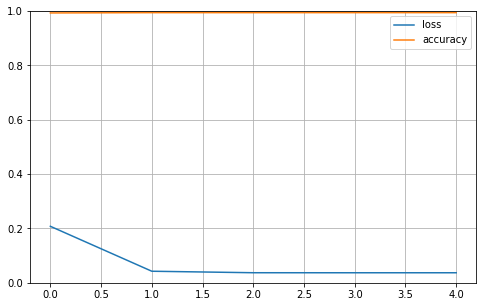

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
#normalizacja wsadowa
import tensorflow as tf
from tensorflow import keras



model = keras.Sequential([
    keras.layers.Dense(47,input_shape=[47,],activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [25]:
history=model.fit(X_train,y_train,batch_size=16,epochs=5)

Epoch 1/5
5341/5341 [==============================] - 5s 845us/step - loss: 0.1822 - accuracy: 0.9374
Epoch 2/5
5341/5341 [==============================] - 6s 1ms/step - loss: 0.0348 - accuracy: 0.9938
Epoch 3/5
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0330 - accuracy: 0.9939
Epoch 4/5
5341/5341 [==============================] - 9s 2ms/step - loss: 0.0341 - accuracy: 0.9937
Epoch 5/5
5341/5341 [==============================] - 7s 1ms/step - loss: 0.0331 - accuracy: 0.9940


In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 47)                2256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 47)                188       
_________________________________________________________________
dropout_6 (Dropout)          (None, 47)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 192       
_________________________________________________________________
batch_normalization_7 (Batch (None, 4)                 16        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 2,657
Trainable params: 2,555
Non-trainable params: 102
__________________________________________________

# Zwiększenie ilości neuronów ukrytych

In [27]:
model = keras.Sequential([
    keras.layers.Dense(256,input_shape=[47,],activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [28]:
history=model.fit(X_train,y_train,batch_size=16,epochs=10)

Epoch 1/10
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0482 - accuracy: 0.9921
Epoch 2/10
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0385 - accuracy: 0.9941
Epoch 3/10
5341/5341 [==============================] - 13s 2ms/step - loss: 0.0378 - accuracy: 0.9939
Epoch 4/10
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0388 - accuracy: 0.9935
Epoch 5/10
5341/5341 [==============================] - 16s 3ms/step - loss: 0.0373 - accuracy: 0.9939
Epoch 6/10
5341/5341 [==============================] - 16s 3ms/step - loss: 0.0386 - accuracy: 0.9937
Epoch 7/10
5341/5341 [==============================] - 13s 2ms/step - loss: 0.0363 - accuracy: 0.9941
Epoch 8/10
5341/5341 [==============================] - 13s 2ms/step - loss: 0.0353 - accuracy: 0.9942
Epoch 9/10
5341/5341 [==============================] - 13s 2ms/step - loss: 0.0370 - accuracy: 0.9936
Epoch 10/10
5341/5341 [==============================] - 13s 2ms/step - l

In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)
y_pred
#y_test
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
f1_score(y_test,y_pred, average=None,labels=[1,0])

0.003124183317098667
0.5


C:\Users\patry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.01241913])

In [30]:
model = keras.Sequential([
    keras.layers.Dense(512,input_shape=[47,],activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [31]:
history=model.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
2671/2671 [==============================] - 10s 3ms/step - loss: 0.0530 - accuracy: 0.9903
Epoch 2/20
2671/2671 [==============================] - 10s 4ms/step - loss: 0.0399 - accuracy: 0.9939
Epoch 3/20
2671/2671 [==============================] - 11s 4ms/step - loss: 0.0367 - accuracy: 0.9942
Epoch 4/20
2671/2671 [==============================] - 10s 4ms/step - loss: 0.0354 - accuracy: 0.9943
Epoch 5/20
2671/2671 [==============================] - 10s 4ms/step - loss: 0.0344 - accuracy: 0.9944
Epoch 6/20
2671/2671 [==============================] - 10s 4ms/step - loss: 0.0377 - accuracy: 0.9938
Epoch 7/20
2671/2671 [==============================] - 10s 4ms/step - loss: 0.0349 - accuracy: 0.9943
Epoch 8/20
2671/2671 [==============================] - 10s 4ms/step - loss: 0.0371 - accuracy: 0.9938
Epoch 9/20
2671/2671 [==============================] - 12s 4ms/step - loss: 0.0371 - accuracy: 0.9938
Epoch 10/20
2671/2671 [==============================] - 13s 5ms/step - l

In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)
y_pred
#y_test
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
f1_score(y_test,y_pred, average=None,labels=[1,0])


0.003124183317098667
0.5


C:\Users\patry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.01241913])

In [33]:
# na całych danych
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(nemak)
flat_list1 = []
flat_list = []
for sublist in y_pred1:
    for item in sublist:
        flat_list1.append(item)
        flat_list.append(round(item))
#y_test
print(precision_score(output, flat_list , average="macro"))
print(recall_score(output, flat_list , average="macro"))
f1_score(output,flat_list, average=None,labels=[1,0])

0.4969423036214101
0.5


C:\Users\patry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.99693293, 0.        ])

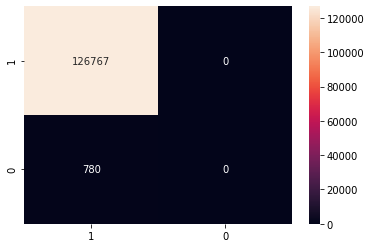

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

labels =[1,0]
labels2 =[0,1]
cm=confusion_matrix (output,flat_list , labels=labels)
df_cm = pd.DataFrame(cm,index=labels, columns=labels)

sn.heatmap(df_cm,annot=True,fmt='d')

In [35]:
data  = {'rzeczywisty':output,'predykcja':flat_list, 'wynik_przewidziany':flat_list1}
sprawdzenie = pd.DataFrame(data=data)



In [36]:
sprawdzenie


,rzeczywisty,predykcja,wynik_przewidziany
0,1,1,0.989561
1,1,1,0.988994
2,1,1,0.996269
3,1,1,0.995583
4,1,1,0.992273
...,...,...,...
127542,1,1,0.998106
127543,1,1,0.998160
127544,1,1,0.998095
127545,1,1,0.998110


In [37]:
sprawdzenie.to_excel("outputshift.xlsx")

In [38]:
#zbalansowanie danych

In [39]:
class_weight = {
    0: 10.0,
    1: 1.0,
}
class_weight=class_weight

history = model.fit(X_train,y_train, class_weight=class_weight, batch_size=32, epochs=10)

Epoch 1/10
2671/2671 [==============================] - 12s 4ms/step - loss: 0.2189 - accuracy: 0.9939
Epoch 2/10
2671/2671 [==============================] - 14s 5ms/step - loss: 0.2138 - accuracy: 0.9937
Epoch 3/10
2671/2671 [==============================] - 17s 6ms/step - loss: 0.2175 - accuracy: 0.9928
Epoch 4/10
2671/2671 [==============================] - 17s 6ms/step - loss: 0.2139 - accuracy: 0.9936
Epoch 5/10
2671/2671 [==============================] - 19s 7ms/step - loss: 0.2062 - accuracy: 0.9937
Epoch 6/10
2671/2671 [==============================] - 15s 5ms/step - loss: 0.2069 - accuracy: 0.9934
Epoch 7/10
2671/2671 [==============================] - 13s 5ms/step - loss: 0.2110 - accuracy: 0.9938
Epoch 8/10
2671/2671 [==============================] - 18s 7ms/step - loss: 0.2109 - accuracy: 0.9935
Epoch 9/10
2671/2671 [==============================] - 24s 9ms/step - loss: 0.2064 - accuracy: 0.9938
Epoch 10/10
2671/2671 [==============================] - 21s 8ms/step - l

# SMOTE



In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)



X_sm, y_sm = sm.fit_resample(X_train,y_train)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size=0.33,random_state=42)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(512,input_shape=[47,],activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [43]:
history=model.fit(X_train,y_train,batch_size=16,epochs=40)

Epoch 1/40
7114/7114 [==============================] - 24s 3ms/step - loss: 0.6167 - accuracy: 0.6786
Epoch 2/40
7114/7114 [==============================] - 26s 4ms/step - loss: 0.5306 - accuracy: 0.7415
Epoch 3/40
7114/7114 [==============================] - 23s 3ms/step - loss: 0.4935 - accuracy: 0.7545
Epoch 4/40
7114/7114 [==============================] - 22s 3ms/step - loss: 0.4828 - accuracy: 0.7576
Epoch 5/40
7114/7114 [==============================] - 25s 3ms/step - loss: 0.4774 - accuracy: 0.7588
Epoch 6/40
7114/7114 [==============================] - 24s 3ms/step - loss: 0.4644 - accuracy: 0.7637
Epoch 7/40
7114/7114 [==============================] - 23s 3ms/step - loss: 0.4545 - accuracy: 0.7704
Epoch 8/40
7114/7114 [==============================] - 24s 3ms/step - loss: 0.4530 - accuracy: 0.7714
Epoch 9/40
7114/7114 [==============================] - 22s 3ms/step - loss: 0.4480 - accuracy: 0.7746
Epoch 10/40
7114/7114 [==============================] - 22s 3ms/step - l

In [44]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(nemak)
y_pred = np.argmax(y_pred1, axis=1)
y_pred
#y_test
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
f1_score(y_test,y_pred, average=None,labels=[1,0])

ValueError: Found input variables with inconsistent numbers of samples: [56060, 127547]

In [45]:
# na całych danych
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(nemak)
flat_list1 = []
flat_list = []
for sublist in y_pred1:
    for item in sublist:
        flat_list1.append(item)
        flat_list.append(round(item))
#y_test
print(precision_score(output, flat_list , average="macro"))
print(recall_score(output, flat_list , average="macro"))
f1_score(output,flat_list, average=None,labels=[1,0])

0.5103545858072452
0.7847615289751255


array([0.88283103, 0.04360476])

In [46]:
data  = {'rzeczywisty':output,'predykcja':flat_list, 'wynik_przewidziany':flat_list1}
sprawdzenies = pd.DataFrame(data=data)

In [47]:
sprawdzenies

,rzeczywisty,predykcja,wynik_przewidziany
0,1,1,0.573077
1,1,1,0.997188
2,1,1,0.992180
3,1,1,0.986438
4,1,1,0.977647
...,...,...,...
127542,1,1,0.999632
127543,1,1,0.999408
127544,1,1,0.999484
127545,1,1,0.999467


In [48]:
sprawdzenies.to_excel("outputsshift.xlsx")

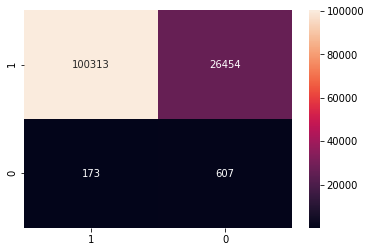

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

labels =[1,0]
labels2 =[0,1]
cm=confusion_matrix (output,flat_list , labels=labels)
df_cm = pd.DataFrame(cm,index=labels, columns=labels)

sn.heatmap(df_cm,annot=True,fmt='d')

# Zwiększenie ilości ukrytych neuronów

In [63]:
model = keras.Sequential([
    keras.layers.Dense(47,input_shape=[47,],activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [64]:
history=model.fit(X_train,y_train,batch_size=32,epochs=40)

Epoch 1/40
3557/3557 [==============================] - 22s 6ms/step - loss: 0.6016 - accuracy: 0.6821
Epoch 2/40
3557/3557 [==============================] - 20s 6ms/step - loss: 0.4949 - accuracy: 0.7495
Epoch 3/40
3557/3557 [==============================] - 20s 6ms/step - loss: 0.4703 - accuracy: 0.7594
Epoch 4/40
3557/3557 [==============================] - 21s 6ms/step - loss: 0.4516 - accuracy: 0.7694
Epoch 5/40
3557/3557 [==============================] - 26s 7ms/step - loss: 0.4428 - accuracy: 0.7758
Epoch 6/40
3557/3557 [==============================] - 31s 9ms/step - loss: 0.4322 - accuracy: 0.7814
Epoch 7/40
3557/3557 [==============================] - 39s 11ms/step - loss: 0.4197 - accuracy: 0.7929
Epoch 8/40
3557/3557 [==============================] - 27s 8ms/step - loss: 0.4093 - accuracy: 0.7987
Epoch 9/40
3557/3557 [==============================] - 20s 6ms/step - loss: 0.3942 - accuracy: 0.8090
Epoch 10/40
3557/3557 [==============================] - 24s 7ms/step - 

In [65]:
# na całych danych
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(nemak)
flat_list1 = []
flat_list = []
for sublist in y_pred1:
    for item in sublist:
        flat_list1.append(item)
        flat_list.append(round(item))
#y_test
print(precision_score(output, flat_list , average="macro"))
print(recall_score(output, flat_list , average="macro"))
f1_score(output,flat_list, average=None,labels=[1,0])

0.5125347969242157
0.8237169525434611


array([0.89390875, 0.05099415])

In [66]:
data  = {'rzeczywisty':output,'predykcja':flat_list, 'wynik_przewidziany':flat_list1}
sprawdzeniess = pd.DataFrame(data=data)

In [67]:
sprawdzeniess

,rzeczywisty,predykcja,wynik_przewidziany
0,1,1,0.999958
1,1,1,0.999859
2,1,1,0.999987
3,1,1,0.999971
4,1,1,0.999897
...,...,...,...
127542,1,1,0.999971
127543,1,1,0.999967
127544,1,1,0.999973
127545,1,1,0.999975


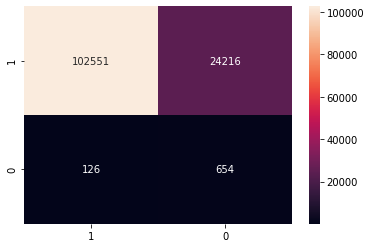

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

labels =[1,0]
labels2 =[0,1]
cm=confusion_matrix (output,flat_list , labels=labels)
df_cm = pd.DataFrame(cm,index=labels, columns=labels)

sn.heatmap(df_cm,annot=True,fmt='d')